In [249]:
import numpy as np
import matplotlib.pyplot as plt

## F-ce 

In [250]:
def f(y, x):
    y1, y2 = y
    dy1_dx = y2
    dy2_dx = ( (2.* y2/x) + (4. * y1 / x**2 ) + (6. /x))
    return np.array([dy1_dx, dy2_dx])

## RK4 Metoda

In [251]:
def RK4(y, x, h):
    k1 = h * f(y, x)
    k2 = h * f(y + h * k1 / 2. , x + 0.5 * h)
    k3 = h * f(y + h * k2 / 2. , x + 0.5 * h)
    k4 = h * f(y + h * k3, x + h)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6.


## Metoda strelby

In [252]:
def metoda_strelby(funkce, y0, y_cil, x0, x_n, h ):
    s_niz = -5 
    s_hor = 5
    presnost = 1e-5   # Точность для сравнения y(2) с -1.5
    nejlep_s = None
    nejlep_posl_y = None

    while abs(s_hor - s_niz) > presnost:
        s = (s_hor + s_niz) / 2
        y = np.array([y0, s])
        x = x0
        draha_y1 = []
        while x < x_n:
            y = funkce(y, x, h)
            draha_y1.append(y[0])
            x += h
        
        posled_y = draha_y1[-1]
        if posled_y - y_cil > 0:
            s_hor = s
        else:
            s_niz = s
            
        if nejlep_posl_y is None or abs(posled_y - y_cil) < abs(nejlep_posl_y - y_cil):
            nejlep_posl_y = posled_y
            nejlep_s = s

    return nejlep_s, np.array(draha_y1) 

## Pocatecni podminky

In [253]:
x_0 = 1.
x_n = 2.
y_0 = 0.
y_cil = -1.5
h = 0.001

## Vyhledani 

In [254]:
parametry = [y_0, y_cil, x_0, x_n, h]
s_nelep, y_draha = metoda_strelby(RK4, *parametry )
s_nelep

-1.9997787475585938

## Zobrazeni vysledku

In [255]:
def zobrazit(x_0, x_n, h, y_hodnoty, nazev_grafu, graf_1 = False, graf_2 = False):
    
    x = [i for i in np.arange(x_0 , x_n , h)]

    if graf_1:
        rozdil_delek = abs(len(x) - len(y_hodnoty))
        if rozdil_delek != 0:
            y_hodnoty = y_hodnoty[:-rozdil_delek]   
        
        plt.rcParams.update({'font.size': 18})         
        plt.plot(x, y_hodnoty)
        plt.title(nazev_grafu)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show;
        
    if graf_2:
        analyt, num = y_hodnoty
        rozdil_delek = abs(len(analyt) - len(num))
        
        if rozdil_delek != 0:
            num = num[:-rozdil_delek]   
        
        plt.rcParams.update({'font.size': 16})
        gdc = np.abs(analyt - num)
        plt.plot(gdc)
        plt.title(f"Globální diskretizační chyba, h = {h}")
        plt.xlabel("Krok")
        plt.ylabel("Chyba")
        plt.show;

Analytické řešení

In [256]:
a_y = np.array(list(map(lambda x: 1/x - x, [i for i in np.arange(x_0, x_n, h)])))

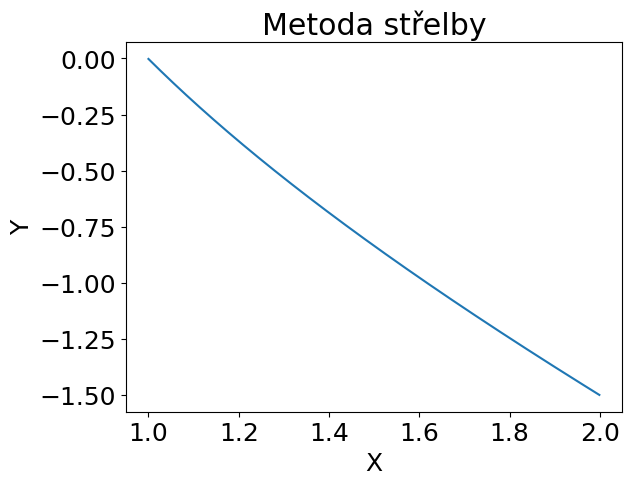

In [257]:
zobrazit(x_0, x_n, h, y_draha, "Metoda střelby", graf_1= True)

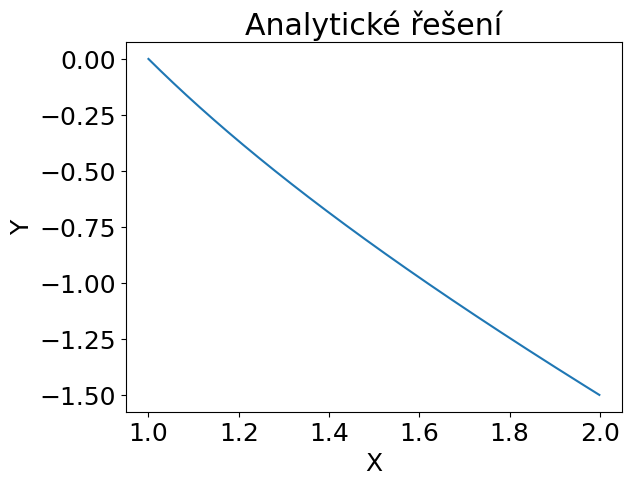

In [258]:
zobrazit(x_0, x_n, h, a_y, "Analytické řešení", graf_1= True)

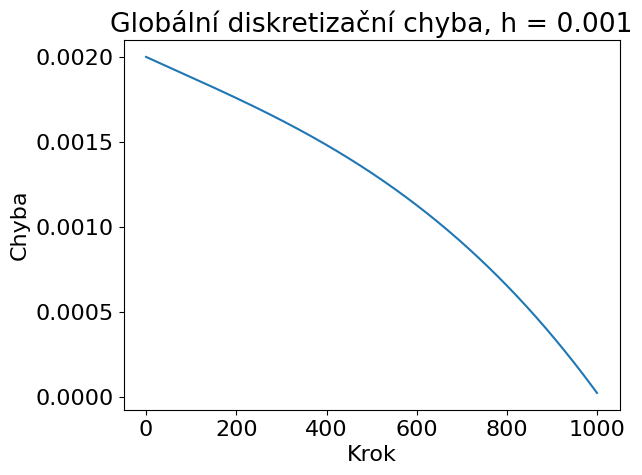

In [259]:
zobrazit(x_0, x_n, h, [a_y, y_draha], "a", graf_2 = True)